/Users/caca/Documents/ds/first_ds_project/notebooks/../scripts/load_data.py:18: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  customer_df = df.groupby('username').agg(


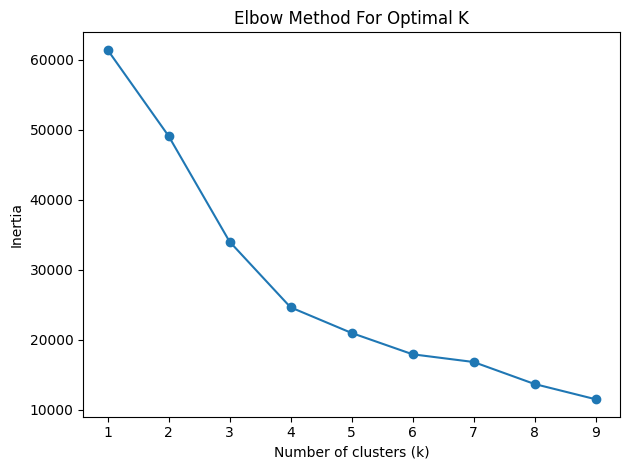

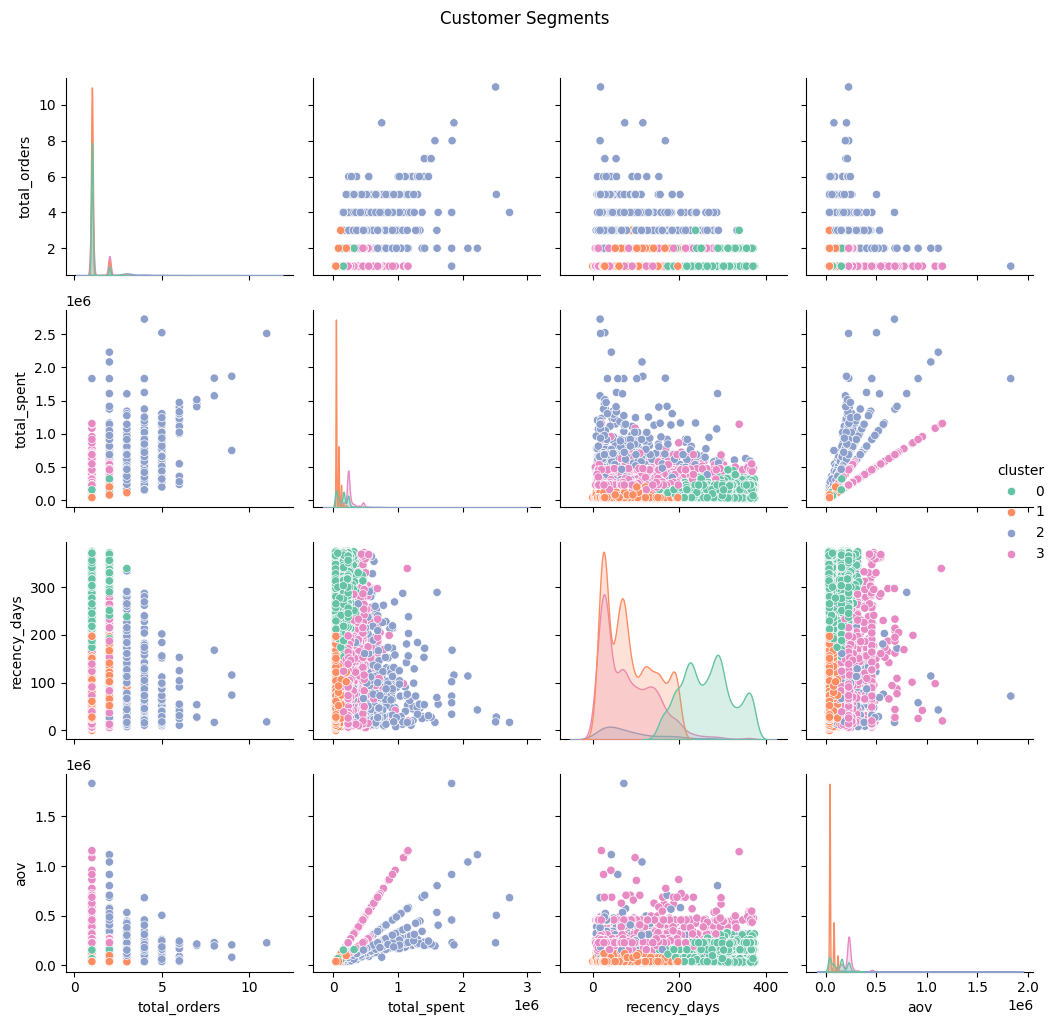

         total_orders    total_spent  recency_days            aov
cluster                                                          
0            1.064182  131987.664774    265.519131  125165.026413
1            1.082163   58303.952297     86.476228   53839.223437
2            3.336976  616711.996357     90.315118  198848.880567
3            1.188503  266692.094474     82.894608  232101.853832


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('../scripts')
from load_data import define_customer_df

customer_df = define_customer_df()

# standardize fetures
features = ['total_orders', 'total_spent', 'recency_days', 'aov'] #define feature to use for clustering
X = customer_df[features].dropna(subset=features)
customer_df_filtered = customer_df.loc[X.index]
scaler = StandardScaler() #to normalize the feature values
X_scaled = scaler.fit_transform(X) #scaling the data to have the same scale

# elbow method to find optimal K

inertia = []
K_range = range(1,10)
for k in K_range:
    # Create a KMeans model with k clusters and a fixed random seed for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42) #random_state can use any number; 
    kmeans.fit(X_scaled) # Fit the KMeans model on the scaled data
    inertia.append(kmeans.inertia_) #the lower the better; inertia = total within-cluster squared euclidean

plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

# Kmeans
kmeans = KMeans(n_clusters=4, random_state=42) #based on elbow method result
customer_df_filtered['cluster'] = kmeans.fit_predict(X_scaled)

# visualize clusters
sns.pairplot(customer_df_filtered, vars=features, hue='cluster', palette='Set2')
plt.suptitle('Customer Segments', y=1.02)
plt.tight_layout()
plt.show()

# check cluster profiles
cluster_summary = customer_df_filtered.groupby('cluster')[features].mean()
print(cluster_summary)
